In [1]:
import os
import pandas as pd

In [2]:
df_list = []

for c in os.listdir('./csvs'):
    df = pd.read_csv('./csvs/'+c)
    df_list.append(df)

all_df = pd.concat(df_list)

In [5]:
all_df.to_csv('./merged_airbnb.csv',index=False)

In [3]:
all_df.shape

(1430, 17)

In [43]:
all_df.isnull().sum()


listing_link                   0
searched_location              0
title_bed_bats_review          0
price_per_night              530
review_count                 896
review_count_link            896
host_link                      1
host_response_rate           441
listing_description          561
cleanliness_ratings         1051
accuracy_ratings            1051
check-in_ratings            1051
communication_ratings       1051
location_ratings            1051
value_ratings               1051
google_map_location_link      12
facilities                     1
dtype: int64

In [44]:
all_df['price_per_night']

0    $70 
0    $84 
1    $20 
2    $14 
3     $8 
     ... 
0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
Name: price_per_night, Length: 1430, dtype: object

In [45]:
all_df['price_per_night'] = all_df['price_per_night'].replace('[\$,]', '', regex=True).astype(float)

In [46]:
import numpy as np

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   listing_link              5 non-null      object 
 1   searched_location         5 non-null      object 
 2   title_bed_bats_review     5 non-null      object 
 3   price_per_night           0 non-null      float64
 4   review_count              0 non-null      float64
 5   review_count_link         0 non-null      float64
 6   host_link                 5 non-null      object 
 7   host_response_rate        1 non-null      object 
 8   listing_description       5 non-null      object 
 9   cleanliness_ratings       0 non-null      float64
 10  accuracy_ratings          0 non-null      float64
 11  check-in_ratings          0 non-null      float64
 12  communication_ratings     0 non-null      float64
 13  location_ratings          0 non-null      float64
 14  value_ratings 

In [48]:
all_df.isnull().sum()

listing_link                   0
searched_location              0
title_bed_bats_review          0
price_per_night              530
review_count                 896
review_count_link            896
host_link                      1
host_response_rate           441
listing_description          561
cleanliness_ratings         1051
accuracy_ratings            1051
check-in_ratings            1051
communication_ratings       1051
location_ratings            1051
value_ratings               1051
google_map_location_link      12
facilities                     1
dtype: int64

In [49]:
all_df['accuracy_ratings'].mean()

4.693403693931398

In [50]:
all_df.shape

(1430, 17)

<Axes: >

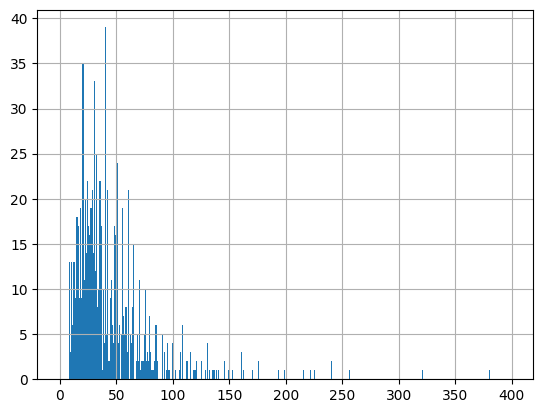

In [51]:
all_df['price_per_night'].hist(bins=[ i for i in range(0,400)])

In [52]:
all_df = all_df.reset_index()

In [53]:
all_df['host_response_rate'] = all_df['host_response_rate'].str.split(":",expand=True)[1]

In [54]:
all_df['host_response_rate'] = all_df['host_response_rate'].str.replace("%","")

In [55]:
all_df['host_response_rate']

0         50
1         50
2        100
3       None
4        100
        ... 
1425     NaN
1426     NaN
1427     100
1428     NaN
1429     NaN
Name: host_response_rate, Length: 1430, dtype: object

In [56]:
all_df['host_response_rate'].value_counts()

host_response_rate
100    548
40     226
90      50
50      19
98      11
96       9
89       9
75       7
80       7
93       6
86       6
83       4
67       4
20       4
71       4
25       4
92       3
60       3
94       3
57       2
97       2
10       1
43       1
29       1
8        1
22       1
73       1
79       1
38       1
70       1
81       1
95       1
53       1
Name: count, dtype: int64

In [65]:
# Function to extract latitude and longitude from URL
def extract_lat_lng(url):
    if isinstance(url, str):  # Check if url is a string (not NaN)
        params = url.split('?')[1].split('&')
        latitude = None
        longitude = None
        for param in params:
            key_value = param.split('=')
            if key_value[0] == 'll':
                lat_lng = key_value[1].split(',')
                latitude = float(lat_lng[0])
                longitude = float(lat_lng[1])
                break
        return latitude, longitude
    else:
        return None, None  # Return None for NaN values

# Apply the function to the 'url' column and create new columns for latitude and longitude
all_df[['latitude', 'longitude']] = all_df['google_map_location_link'].apply(lambda x: pd.Series(extract_lat_lng(x)))


In [66]:
all_df[['latitude', 'longitude']]

,latitude,longitude
0,NaN,NaN
1,22.362980,91.827960
2,22.366900,91.829100
3,22.378060,91.854980
4,22.356300,91.810700
...,...,...
1425,22.778333,89.724451
1426,22.590000,89.848400
1427,22.702143,90.371497
1428,21.818050,90.121490


In [67]:
all_df

,index,listing_link,searched_location,title_bed_bats_review,price_per_night,review_count,review_count_link,host_link,host_response_rate,listing_description,cleanliness_ratings,accuracy_ratings,check-in_ratings,communication_ratings,location_ratings,value_ratings,google_map_location_link,facilities,latitude,longitude
0,0,https://www.airbnb.com/rooms/88682598992554081...,Chattogram,Rental unit in Chittagong · 3 bedrooms · 4 bed...,70.0,1 review,https://www.airbnb.com/rooms/88682598992554081...,https://www.airbnb.com/users/show/513745807,50,"Very stylish,luxury,cool,relaxing,whole Chitta...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['Washer', 'Dryer', 'TV', 'Air conditioning', ...",NaN,NaN
1,0,https://www.airbnb.com/rooms/74127529237768681...,Chattogram,Rental unit in Chittagong · 3 bedrooms · 4 bed...,84.0,1 review,https://www.airbnb.com/rooms/74127529237768681...,https://www.airbnb.com/users/show/483375765,50,Bring the whole family over to this exquisite ...,NaN,NaN,NaN,NaN,NaN,NaN,"https://maps.google.com/maps?ll=22.36298,91.82...","['Mountain view', 'Free washer – In unit', 'Fr...",22.362980,91.827960
2,1,https://www.airbnb.com/rooms/46789946?adults=1...,Chattogram,Rental unit in Chittagong · ★4.33 · 3 bedrooms...,20.0,3 reviews,https://www.airbnb.com/rooms/46789946/reviews?...,https://www.airbnb.com/users/show/193917847,100,NaN,3.3,4.3,3.7,4.3,4.7,4.7,"https://maps.google.com/maps?ll=22.3669,91.829...","['Bidet', 'Hot water', 'Essentials', 'Ethernet...",22.366900,91.829100
3,2,https://www.airbnb.com/rooms/33146710?adults=1...,Chattogram,Rental unit in Chittagong · 3 bedrooms · 1 bath,14.0,NaN,NaN,https://www.airbnb.com/users/show/249410653,None,The space,NaN,NaN,NaN,NaN,NaN,NaN,"https://maps.google.com/maps?ll=22.37806,91.85...","['Hair dryer', 'Hot water', 'Washer', 'Dryer',...",22.378060,91.854980
4,3,https://www.airbnb.com/rooms/94814893356064888...,Chattogram,Tiny home in Chittagong · 1 bedroom · 1 bed · ...,8.0,NaN,NaN,https://www.airbnb.com/users/show/196272404,100,Welcome to our cozy and unique furnished livin...,NaN,NaN,NaN,NaN,NaN,NaN,"https://maps.google.com/maps?ll=22.3563,91.810...","['Outdoor shower', 'Exterior security cameras ...",22.356300,91.810700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1425,0,https://www.airbnb.com/rooms/10257503846395791...,Patuakhali,Home in Fakirhat · 2 bedrooms · 2 beds · 1 bath,NaN,NaN,NaN,https://www.airbnb.com/users/show/126063499,NaN,Welcome to our charming retreat in the heart o...,NaN,NaN,NaN,NaN,NaN,NaN,"https://maps.google.com/maps?ll=22.778333,89.7...","['Shampoo', 'Hot water', 'Essentials', 'Hanger...",22.778333,89.724451
1426,1,https://www.airbnb.com/rooms/52017590?adults=1...,Patuakhali,Villa in Bagerhat District · 1 bedroom · 1 bed...,NaN,NaN,NaN,https://www.airbnb.com/users/show/117580222,NaN,"Kick back and relax in this calm, stylish space.",NaN,NaN,NaN,NaN,NaN,NaN,"https://maps.google.com/maps?ll=22.59,89.8484&...","['Outdoor shower', 'Iron', 'TV', 'Dedicated wo...",22.590000,89.848400
1427,2,https://www.airbnb.com/rooms/11301829800703733...,Patuakhali,Rental unit in Barisal · ★New · 20 bedrooms · ...,NaN,NaN,NaN,https://www.airbnb.com/users/show/566943528,100,We have a lot of effort to bring more quality ...,NaN,NaN,NaN,NaN,NaN,NaN,"https://maps.google.com/maps?ll=22.702143,90.3...","['TV', 'Air conditioning', 'Smoke alarm', 'Fir...",22.702143,90.371497
1428,3,https://www.airbnb.com/rooms/53844727?adults=1...,Patuakhali,Hotel in কলাপাড়া · 1 bedroom · 2 beds · 1 pri...,NaN,NaN,NaN,https://www.airbnb.com/users/show/337730115,NaN,This stylish place is close to must-see destin...,NaN,NaN,NaN,NaN,NaN,NaN,"https://maps.google.com/maps?ll=21.81805,90.12...","['TV', 'Smoke alarm', 'Carbon monoxide alarm',...",21.818050,90.121490


In [68]:
pip install pandas folium


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 100.0/100.0 kB 1.9 MB/s eta 0:00:00
   ---------------------------------------- 83.9/83.9 kB 4.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [70]:
all_df

,index,listing_link,searched_location,title_bed_bats_review,price_per_night,review_count,review_count_link,host_link,host_response_rate,listing_description,cleanliness_ratings,accuracy_ratings,check-in_ratings,communication_ratings,location_ratings,value_ratings,google_map_location_link,facilities,latitude,longitude
0,0,https://www.airbnb.com/rooms/88682598992554081...,Chattogram,Rental unit in Chittagong · 3 bedrooms · 4 bed...,70.0,1 review,https://www.airbnb.com/rooms/88682598992554081...,https://www.airbnb.com/users/show/513745807,50,"Very stylish,luxury,cool,relaxing,whole Chitta...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['Washer', 'Dryer', 'TV', 'Air conditioning', ...",NaN,NaN
1,0,https://www.airbnb.com/rooms/74127529237768681...,Chattogram,Rental unit in Chittagong · 3 bedrooms · 4 bed...,84.0,1 review,https://www.airbnb.com/rooms/74127529237768681...,https://www.airbnb.com/users/show/483375765,50,Bring the whole family over to this exquisite ...,NaN,NaN,NaN,NaN,NaN,NaN,"https://maps.google.com/maps?ll=22.36298,91.82...","['Mountain view', 'Free washer – In unit', 'Fr...",22.362980,91.827960
2,1,https://www.airbnb.com/rooms/46789946?adults=1...,Chattogram,Rental unit in Chittagong · ★4.33 · 3 bedrooms...,20.0,3 reviews,https://www.airbnb.com/rooms/46789946/reviews?...,https://www.airbnb.com/users/show/193917847,100,NaN,3.3,4.3,3.7,4.3,4.7,4.7,"https://maps.google.com/maps?ll=22.3669,91.829...","['Bidet', 'Hot water', 'Essentials', 'Ethernet...",22.366900,91.829100
3,2,https://www.airbnb.com/rooms/33146710?adults=1...,Chattogram,Rental unit in Chittagong · 3 bedrooms · 1 bath,14.0,NaN,NaN,https://www.airbnb.com/users/show/249410653,None,The space,NaN,NaN,NaN,NaN,NaN,NaN,"https://maps.google.com/maps?ll=22.37806,91.85...","['Hair dryer', 'Hot water', 'Washer', 'Dryer',...",22.378060,91.854980
4,3,https://www.airbnb.com/rooms/94814893356064888...,Chattogram,Tiny home in Chittagong · 1 bedroom · 1 bed · ...,8.0,NaN,NaN,https://www.airbnb.com/users/show/196272404,100,Welcome to our cozy and unique furnished livin...,NaN,NaN,NaN,NaN,NaN,NaN,"https://maps.google.com/maps?ll=22.3563,91.810...","['Outdoor shower', 'Exterior security cameras ...",22.356300,91.810700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1425,0,https://www.airbnb.com/rooms/10257503846395791...,Patuakhali,Home in Fakirhat · 2 bedrooms · 2 beds · 1 bath,NaN,NaN,NaN,https://www.airbnb.com/users/show/126063499,NaN,Welcome to our charming retreat in the heart o...,NaN,NaN,NaN,NaN,NaN,NaN,"https://maps.google.com/maps?ll=22.778333,89.7...","['Shampoo', 'Hot water', 'Essentials', 'Hanger...",22.778333,89.724451
1426,1,https://www.airbnb.com/rooms/52017590?adults=1...,Patuakhali,Villa in Bagerhat District · 1 bedroom · 1 bed...,NaN,NaN,NaN,https://www.airbnb.com/users/show/117580222,NaN,"Kick back and relax in this calm, stylish space.",NaN,NaN,NaN,NaN,NaN,NaN,"https://maps.google.com/maps?ll=22.59,89.8484&...","['Outdoor shower', 'Iron', 'TV', 'Dedicated wo...",22.590000,89.848400
1427,2,https://www.airbnb.com/rooms/11301829800703733...,Patuakhali,Rental unit in Barisal · ★New · 20 bedrooms · ...,NaN,NaN,NaN,https://www.airbnb.com/users/show/566943528,100,We have a lot of effort to bring more quality ...,NaN,NaN,NaN,NaN,NaN,NaN,"https://maps.google.com/maps?ll=22.702143,90.3...","['TV', 'Air conditioning', 'Smoke alarm', 'Fir...",22.702143,90.371497
1428,3,https://www.airbnb.com/rooms/53844727?adults=1...,Patuakhali,Hotel in কলাপাড়া · 1 bedroom · 2 beds · 1 pri...,NaN,NaN,NaN,https://www.airbnb.com/users/show/337730115,NaN,This stylish place is close to must-see destin...,NaN,NaN,NaN,NaN,NaN,NaN,"https://maps.google.com/maps?ll=21.81805,90.12...","['TV', 'Smoke alarm', 'Carbon monoxide alarm',...",21.818050,90.121490


In [71]:
df_loc = all_df[['latitude','longitude']]

In [73]:
df_loc.dropna(inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_16428\3313519909.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loc.dropna(inplace=True)


In [80]:
import pandas as pd
import folium
from folium.plugins import HeatMap


# Initialize a map centered around the average latitude and longitude
m = folium.Map(location=[df_loc['latitude'].mean(), df_loc['longitude'].mean()], zoom_start=7)

# Create a list of locations for the heatmap
heat_data = [[row['latitude'], row['longitude']] for index, row in df_loc.iterrows()]

# Add the heatmap layer to the map
HeatMap(heat_data,
        min_opacity=0.5,
        max_val=1.0,
        radius=10,  # Increasing the radius for better visibility
        blur=10,
        gradient={0.4: 'blue', 0.65: 'lime', 1: 'red'}  # Custom gradient
       ).add_to(m)


# Save the map to an HTML file
m.save('bangladesh_heatmap.html')



C:\Users\user\AppData\Local\Temp\ipykernel_16428\3931218734.py:13: UserWarning: The `max_val` parameter is no longer necessary. The largest intensity is calculated automatically.
  HeatMap(heat_data,


In [81]:
m

In [82]:
df_loc = all_df[['latitude','longitude','price_per_night']]

In [83]:
df_loc

,latitude,longitude,price_per_night
0,NaN,NaN,70.0
1,22.362980,91.827960,84.0
2,22.366900,91.829100,20.0
3,22.378060,91.854980,14.0
4,22.356300,91.810700,8.0
...,...,...,...
1425,22.778333,89.724451,NaN
1426,22.590000,89.848400,NaN
1427,22.702143,90.371497,NaN
1428,21.818050,90.121490,NaN


In [84]:
df_loc.dropna(inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_16428\3313519909.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loc.dropna(inplace=True)


In [85]:
df_loc

,latitude,longitude,price_per_night
1,22.362980,91.827960,84.0
2,22.366900,91.829100,20.0
3,22.378060,91.854980,14.0
4,22.356300,91.810700,8.0
5,22.348290,91.818250,90.0
...,...,...,...
1411,26.735200,88.437200,35.0
1412,26.729800,88.432900,20.0
1413,26.652120,88.418810,22.0
1414,26.651600,88.417900,22.0


In [106]:

# Initialize a map centered around the average latitude and longitude of Bangladesh
m = folium.Map(location=[df_loc['latitude'].mean(), df_loc['longitude'].mean()], zoom_start=7)

# Create a list of locations with price for the heatmap
heat_data = [[row['latitude'], row['longitude'], row['price_per_night']] for index, row in df_loc.iterrows()]

# Add the heatmap layer to the map with customization
HeatMap(heat_data,
        min_opacity=0.5,
        max_val=max(df_loc['price_per_night']),  # Set the maximum value to the maximum price
        radius=10,  # Increasing the radius for better visibility
        blur=10,
        
       ).add_to(m)


# Save the map to an HTML file
m.save('bangladesh_heatmap_with_price.html')

C:\Users\user\AppData\Local\Temp\ipykernel_16428\1695799316.py:8: UserWarning: The `max_val` parameter is no longer necessary. The largest intensity is calculated automatically.
  HeatMap(heat_data,


In [107]:
m